In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [12]:
missing_values = df.isnull().sum()
print(missing_values)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [4]:
df.shape

(21613, 21)

In [5]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [6]:
print("The maximum price of a house is {}".format(df['price'].max()))
print("The minimum price of a house is {}".format(df['price'].min()))
print("The mean price of houses is {}".format(df['price'].mean()))
print("The median price of houses is {}".format(df['price'].median()))

The maximum price of a house is 7700000.0
The minimum price of a house is 75000.0
The mean price of houses is 540088.1417665294
The median price of houses is 450000.0


In [7]:
print(df['yr_built'].max())
print(df['yr_built'].min())

2015
1900


In [20]:
#Select features and target variable
features = df[['sqft_living', 'bedrooms']]  # You can include more features as needed
target = df['price']

In [17]:
#Select features and target variable
X = df[['sqft_living', 'bedrooms']]
y = df['price']
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
#Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

#Make predictions
predictions = model.predict(X_test)

#Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 74174783292.51218


In [22]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2) Score: {r2}')

R-squared (R2) Score: 0.5093504668464703


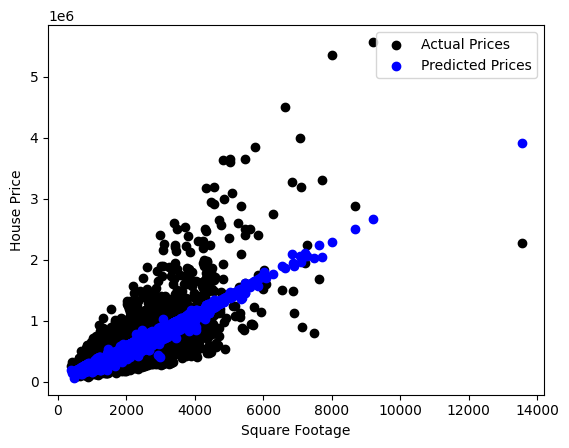

In [11]:
plt.scatter(X_test['sqft_living'], y_test, color='black', label='Actual Prices')
plt.scatter(X_test['sqft_living'], predictions, color='blue', label='Predicted Prices')
plt.xlabel('Square Footage')
plt.ylabel('House Price')
plt.legend()
plt.show()

<ipython-input-24-45d773a25fa8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, fmt=".2f", linewidths=.5, ax=ax)


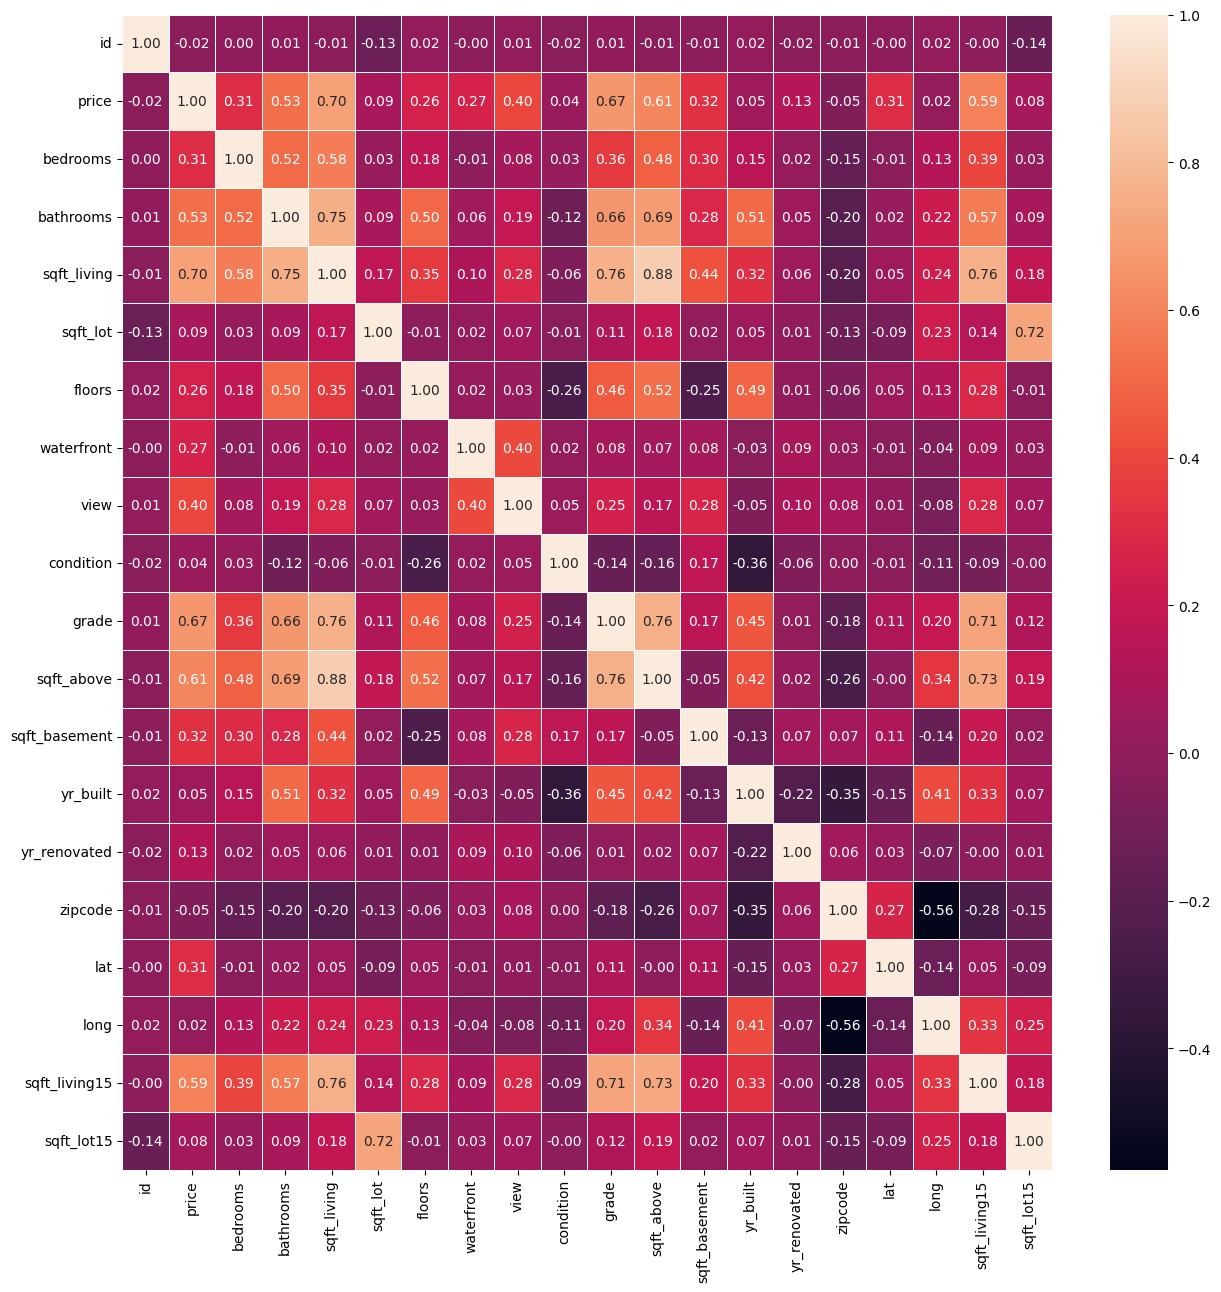

In [24]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(),annot=True, fmt=".2f", linewidths=.5, ax=ax)
plt.show()

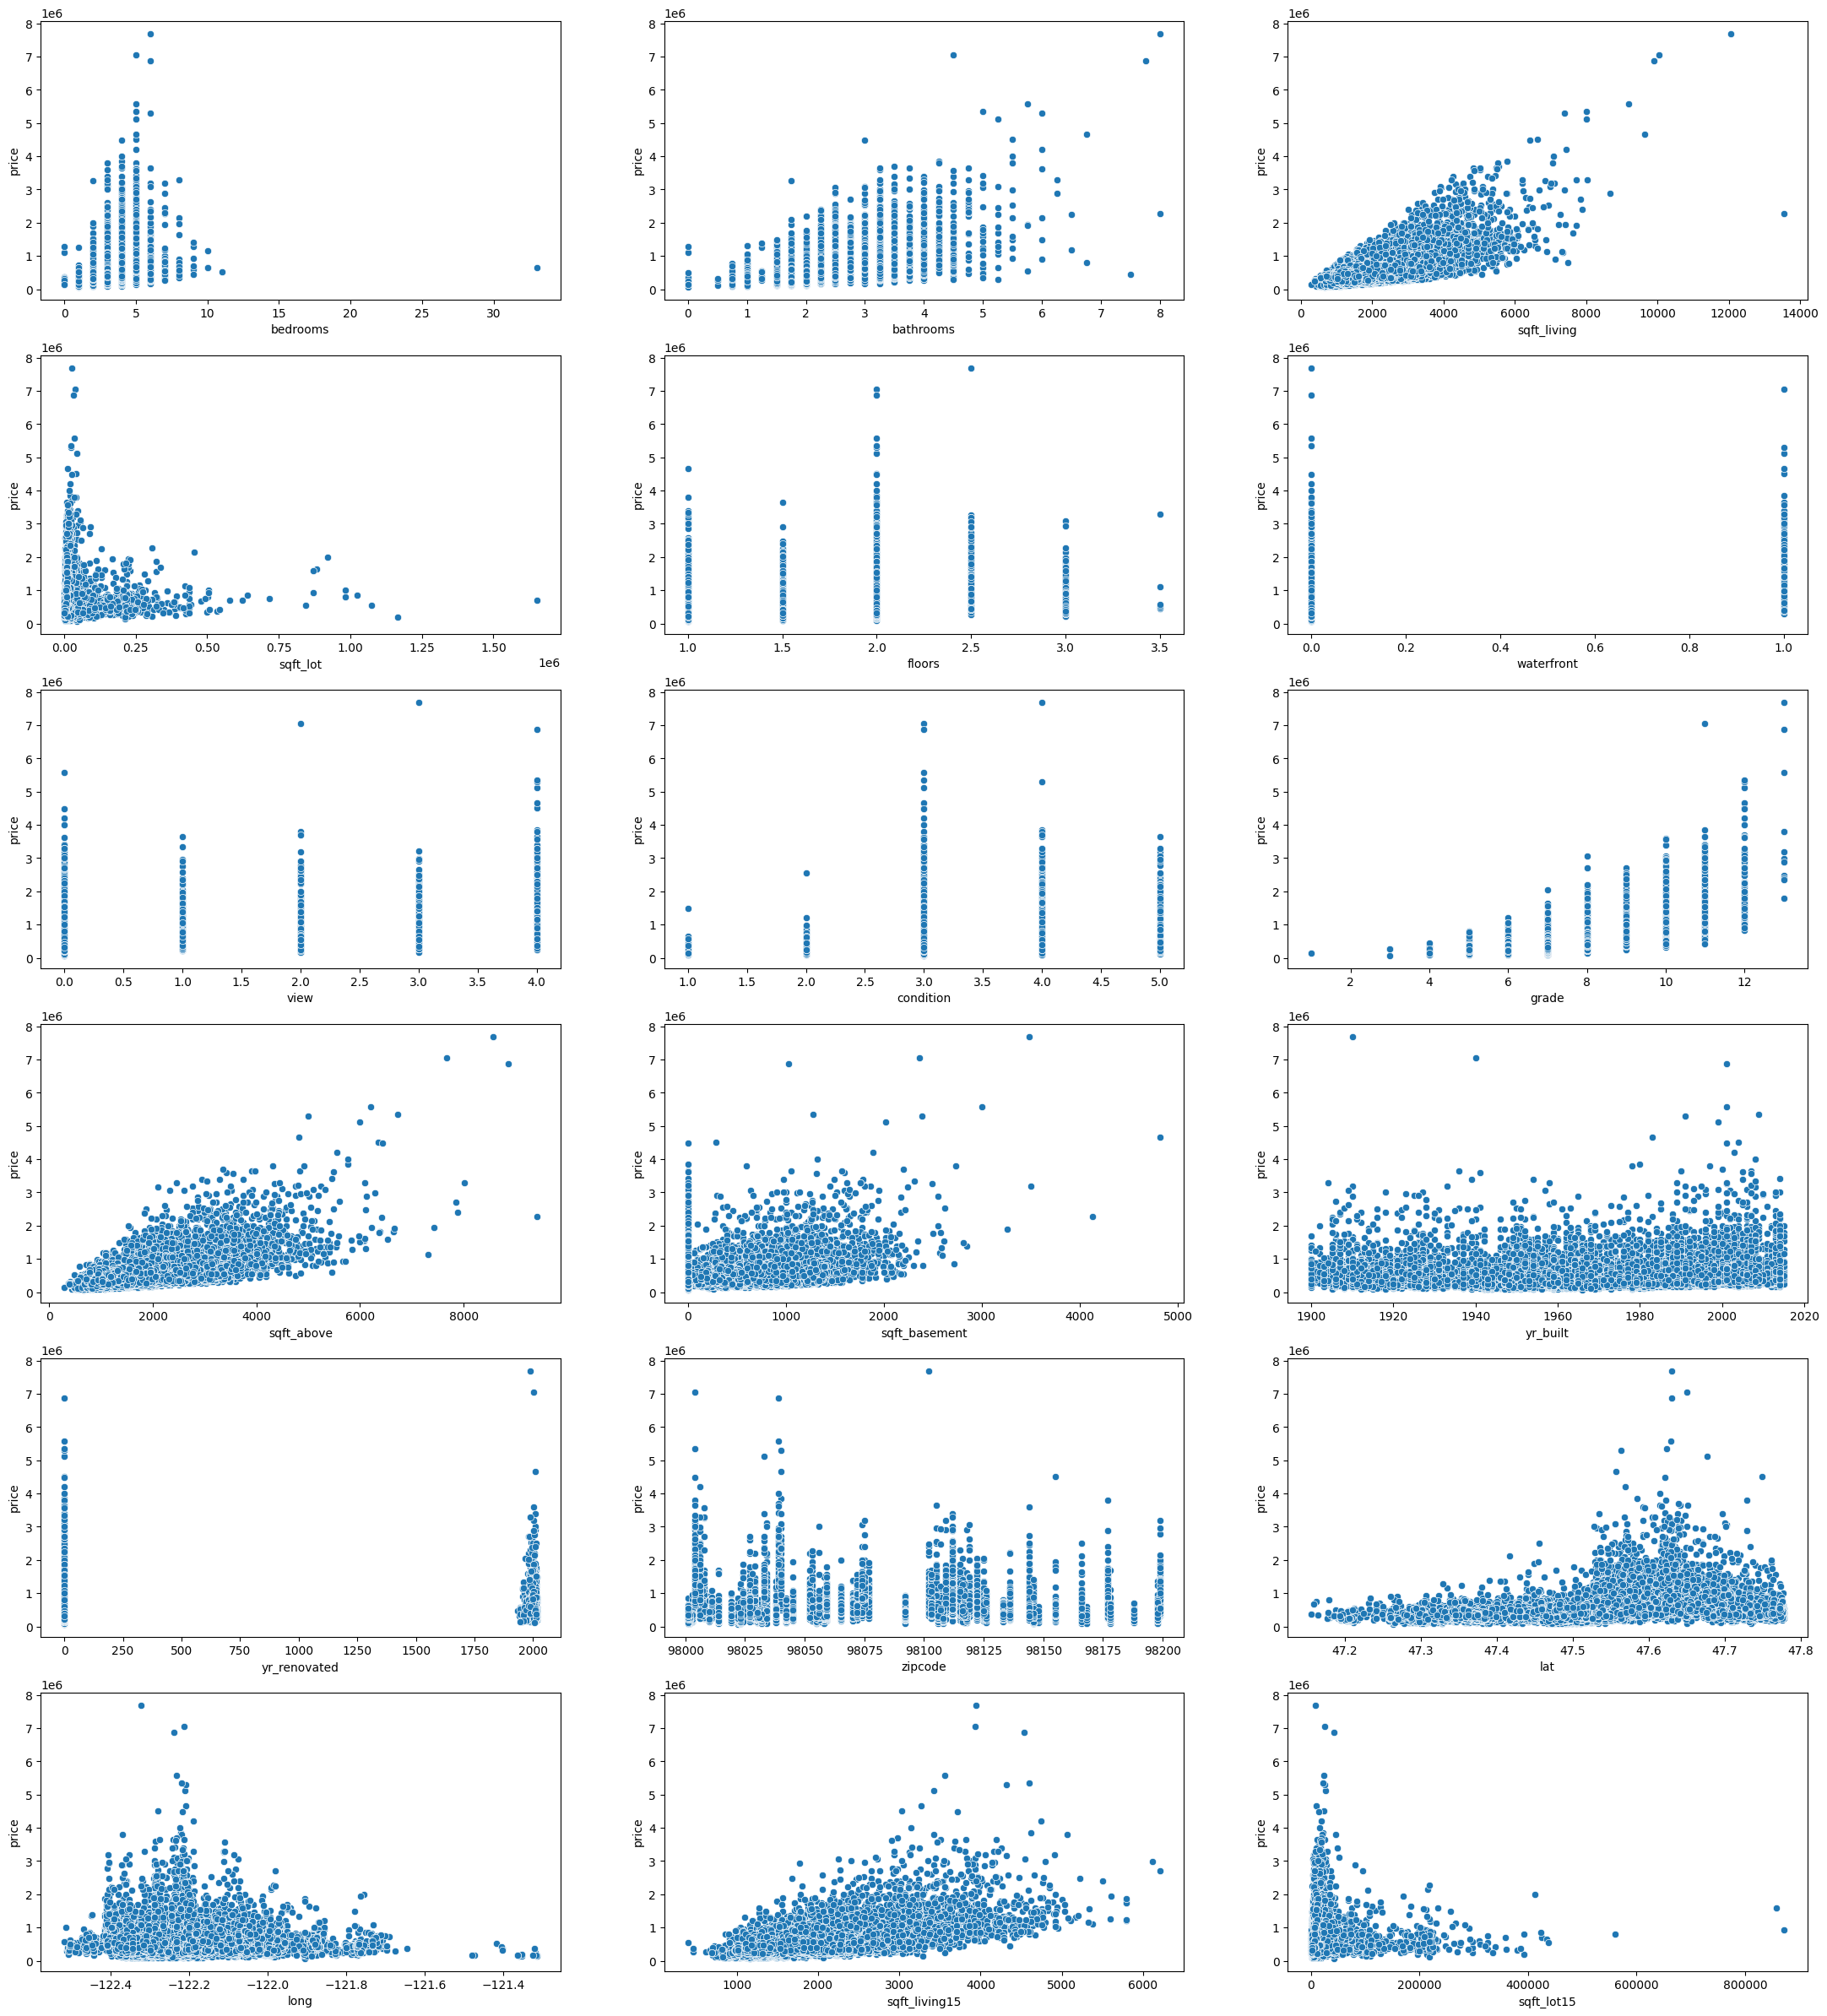

In [28]:
fig, ax= plt.subplots(figsize=(27,30), ncols=3, nrows=6)
sns.scatterplot(x="bedrooms", y="price",data=df, ax=ax[0][0])
sns.scatterplot(x="bathrooms", y="price",data=df, ax=ax[0][1])
sns.scatterplot(x="sqft_living", y="price",data=df, ax=ax[0][2])
sns.scatterplot(x="sqft_lot", y="price",data=df, ax=ax[1][0])
sns.scatterplot(x="floors", y="price",data=df, ax=ax[1][1])
sns.scatterplot(x="waterfront", y="price",data=df, ax=ax[1][2])
sns.scatterplot(x="view", y="price",data=df, ax=ax[2][0])
sns.scatterplot(x="condition", y="price",data=df, ax=ax[2][1])
sns.scatterplot(x="grade", y="price",data=df, ax=ax[2][2])
sns.scatterplot(x="sqft_above", y="price",data=df, ax=ax[3][0])
sns.scatterplot(x="sqft_basement", y="price",data=df, ax=ax[3][1])
sns.scatterplot(x="yr_built", y="price",data=df, ax=ax[3][2])
sns.scatterplot(x="yr_renovated", y="price",data=df, ax=ax[4][0])
sns.scatterplot(x="zipcode", y="price",data=df, ax=ax[4][1])
sns.scatterplot(x="lat", y="price",data=df, ax=ax[4][2])
sns.scatterplot(x="long", y="price",data=df, ax=ax[5][0])
sns.scatterplot(x="sqft_living15", y="price",data=df, ax=ax[5][1])
sns.scatterplot(x="sqft_lot15", y="price",data=df, ax=ax[5][2])
plt.show();

<Axes: title={'center': 'House prices by sqft_living'}, xlabel='sqft_above', ylabel='price'>

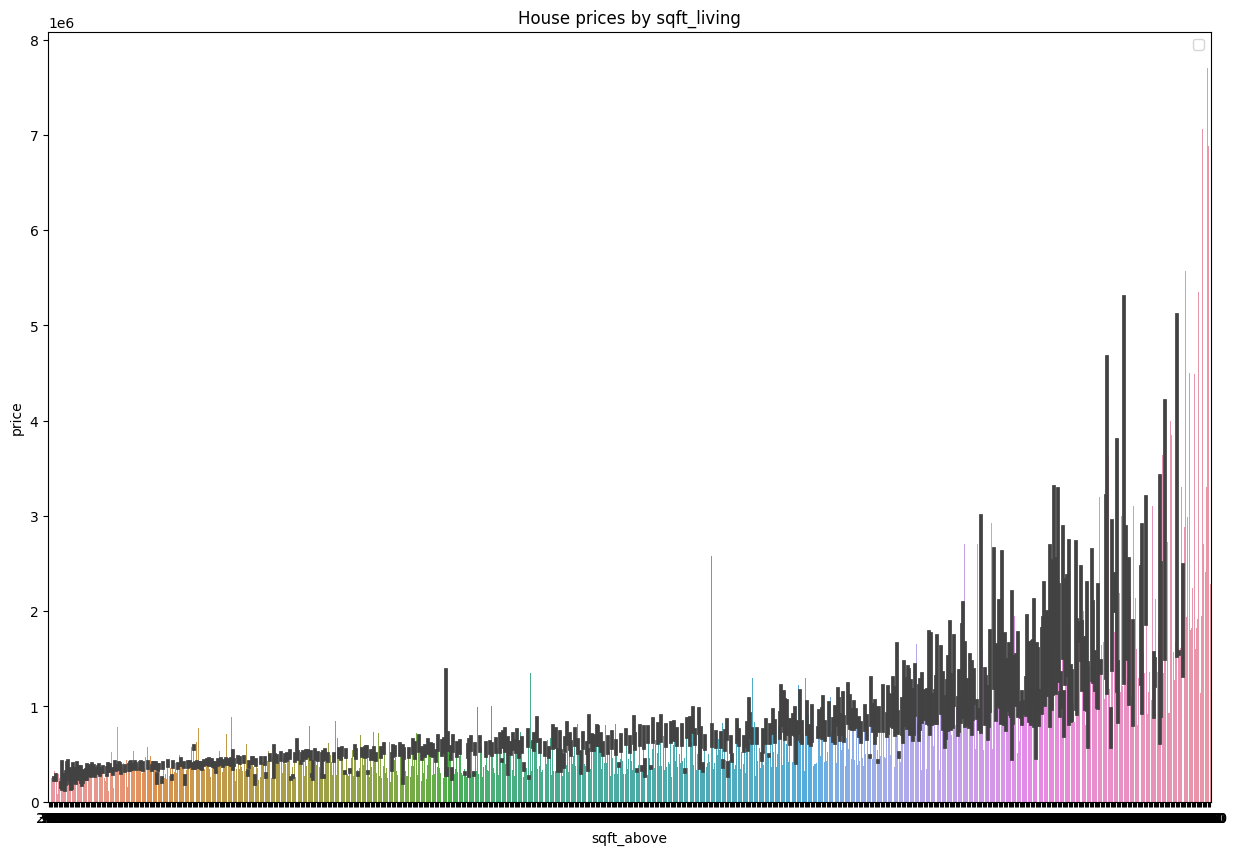

In [29]:
fig,axes = plt.subplots(nrows=1,ncols=1, figsize=(15,10))
plt.title('House prices by sqft_living')
plt.xlabel('sqft_above')
plt.ylabel('House Prices')
plt.legend()
sns.barplot(x='sqft_above', y='price', data = df)